In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import hermite
from scipy.constants import hbar
import math
import matplotlib.style as style
style.use('dark_background')
import matplotlib.animation as animation
from math import factorial


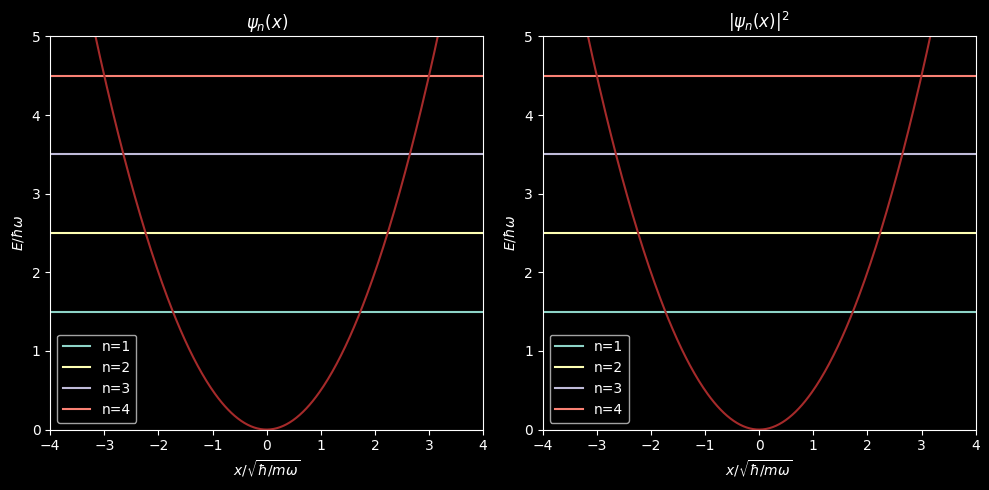

In [ ]:

def psi_n(x, n, m=1, omega=1):
    for i in range(n):
        Hn = hermite(i)
        norm = (2**i * math.factorial(i))**-0.5 * (m*omega/(np.pi*hbar))**0.25
        return norm * np.exp(-m*omega*x**2/(2*hbar)) * Hn(np.sqrt(m*omega/hbar) * x)

x = np.linspace(-4, 4, 400)
n_max = 4
m, omega = 1, 1
E_levels = [(n + 0.5) for n in range(n_max + 1)]
V = 0.5 * m * omega**2 * x**2

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

for n in range(1, n_max + 1):  # Start from n=1
    E = E_levels[n]
    y_shifted = psi_n(x, n, m, omega) + E
    axes[0].plot(x, y_shifted, label=f'n={n}')
    axes[1].plot(x, psi_n(x, n, m, omega)**2 + E, label=f'n={n}')

for ax in axes:
    ax.plot(x, V, 'brown')
    ax.set_xlabel(r'$x/\sqrt{\hbar/m\omega}$')
    ax.set_ylabel(r'$E/\hbar\omega$')
    ax.set_xlim(-4, 4)
    ax.set_ylim(0, E_levels[-1] + 0.5)
    ax.legend()

axes[0].set_title(r'$\psi_n(x)$')
axes[1].set_title(r'$|\psi_n(x)|^2$')

plt.tight_layout()
plt.show()
## this is still broken need to fix this

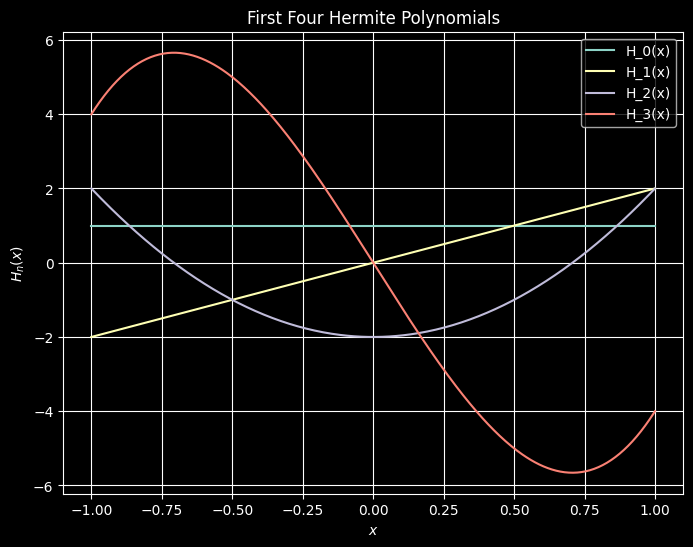

In [5]:
def plot_first_four_hermite_polynomials():
    x = np.linspace(-1, 1, 400)
    n_max = 3
    fig, ax = plt.subplots(figsize=(8, 6))

    for n in range(n_max + 1):
        Hn = hermite(n)
        ax.plot(x, Hn(x), label=f'H_{n}(x)')

    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$H_n(x)$')
    ax.set_title('First Four Hermite Polynomials')
    ax.legend()
    plt.grid()
    plt.show()
plot_first_four_hermite_polynomials()

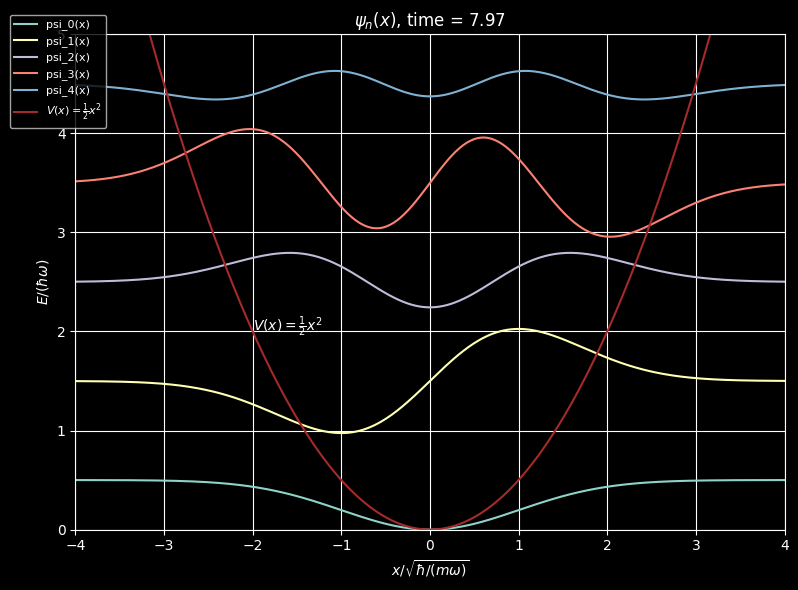

In [6]:
#set params
framerate = 30  #fps
duration = 8   #ani duration
dt = 1/framerate  #timestep per
frames = int(duration * framerate)  #frames

#prof used natrual/normalized units
m, omega, hbar = 1, 1, 1

def psi_n(x, n, m=1, omega=1, hbar=1):
    '''
    calculate the n-th qho wavefunction at physical coordinate x.
    note: x is physical; convert to normalized coordinate.
    '''
    xi = np.sqrt(m*omega/hbar)*x
    norm = (m*omega/(np.pi*hbar))**0.25 / np.sqrt(2**n * factorial(n))
    Hn = hermite(n)(xi)
    return norm * np.exp(-m*omega*x**2/(2*hbar)) * Hn

#np range of noramlized x vals
x_norm = np.linspace(-4, 4, 400)  #norm coordinate values
#norm x to phy x
x_phys = x_norm * np.sqrt(hbar/(m*omega))  # physical coordinate

n_max = 4  #psi_n nums
#norm energy levels compute normalized energy level (+1/2)
E_levels = [n + 0.5 for n in range(n_max + 1)]
#normalized potential: V/(hbar*omega) = 0.5 * x_norm**2
V_norm = 0.5 * x_norm**2

#fig ax call
fig, ax = plt.subplots(figsize=(8, 6))

#initial psi for each E level
lines = []  #list hold obj.
for n in range(n_max + 1):
    E = E_levels[n]
    psi_vals = psi_n(x_phys, n, m, omega, hbar)
    #real part polot + energy level shift
    line, = ax.plot(x_norm, np.real(psi_vals) + E, label=f'psi_{n}(x)')
    lines.append(line)

#pot. curve, believe this is what prof had in class today
ax.plot(x_norm, V_norm, color='brown', label=r'$V(x)=\frac{1}{2}x^2$')
ax.set_xlabel(r'$x/\sqrt{\hbar/(m\omega)}$')
ax.set_ylabel(r'$E/(\hbar\omega)$')
ax.set_xlim(-4, 4)
ax.set_ylim(0, E_levels[-1] + 0.5)
ax.legend(fontsize=8, loc='upper left', bbox_to_anchor=(-0.1, 1.05))
ax.annotate(r'$V(x)=\frac{1}{2}x^2$', xy=(0, 0), xytext=(-2, 2))
#grid axis
ax.grid()
ax.set_title(r'$\psi_n(x)$, time = 0.00')

def update(frame):
    #recall current time
    t = frame * dt
    #add time evo for for each psi
    for n, line in enumerate(lines):
        E = E_levels[n]
        psi_vals = psi_n(x_phys, n, m, omega, hbar)
        #update real psi * exp(-1j*E*t) -> shifted by energy level
        line.set_ydata(np.real(psi_vals * np.exp(-1j * E * t)) + E)
    #title update with dt+t for current time ellapsed
    ax.set_title(r'$\psi_n(x)$, time = {:.2f}'.format(t))
    return lines

#ani call
ani = animation.FuncAnimation(fig, update, frames=frames, interval=1000/framerate, blit=True)

#save to local env.
ani.save('QHO_animation_psi.gif', writer='pillow')

plt.tight_layout()
plt.show()
